In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopandas import GeoDataFrame
import geopandas as gpd

sns.set_style('darkgrid')

In [198]:
sales_gdf = pd.read_csv('data/sales_gdf.csv')

In [199]:
final_df = pd.read_csv('data/Full_Data_long.csv')
final_df.info()
final_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218374 entries, 0 to 218373
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   GEO_ID                    218353 non-null  object 
 1   Year                      218374 non-null  int64  
 2   pin                       218374 non-null  int64  
 3   sale_price                218374 non-null  float64
 4   age                       218374 non-null  int64  
 5   addr                      218371 non-null  object 
 6   hd_sf                     218374 non-null  float64
 7   n_units                   218374 non-null  float64
 8   bldg_sf                   132602 non-null  float64
 9   geometry                  218374 non-null  object 
 10  pri_neigh                 218374 non-null  object 
 11  sec_neigh                 218374 non-null  object 
 12  side                      218374 non-null  object 
 13  actual_sf                 218374 non-null  f

,GEO_ID,Year,pin,sale_price,age,addr,hd_sf,n_units,bldg_sf,geometry,...,Percent White,Percent Black,Percent HH with Children,Percent Housing Vacant,Number of Public Schools,crime_count,crimes_per_capita,station_id,station_name,distance_miles
0,1500000US170318392002,2015,17273100931118,53000.0,44,2921 S MICHIGAN AVE,365398.0,679.0,NaN,POINT (-87.62257654590501 41.8402291575061),...,0.122995,0.699771,0.265432,0.111835,1.0,209.0,0.159664,30382.0,Cermak-McCormick Place,0.213983
1,1500000US170313514001,2018,17343220150000,410000.0,130,3819 S WABASH AVE,3850.0,1.0,5050.0,POINT (-87.62436774377279 41.8249549567756),...,0.034858,0.917211,0.433090,0.062945,1.0,296.0,0.161220,30214.0,35th-Bronzeville-IIT,0.183507
2,1500000US170318420001,2019,17341030641004,250000.0,11,223 E 31ST ST,2738.0,3.0,NaN,POINT (-87.62080085952471 41.8381539098695),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30214.0,35th-Bronzeville-IIT,0.303191


In [200]:
final_df[final_df['pri_neigh'] == 'Loop'][['pri_neigh', 'sale_price', 'addr', 'actual_sf']].sort_values(by='actual_sf')

,pri_neigh,sale_price,addr,actual_sf
178735,Loop,24000.0,235 W VAN BUREN ST,17.332037
180119,Loop,26000.0,235 W VAN BUREN ST,17.332037
180368,Loop,235000.0,235 W VAN BUREN ST,17.332037
179494,Loop,295000.0,235 W VAN BUREN ST,17.332037
180036,Loop,318500.0,235 W VAN BUREN ST,17.332037
...,...,...,...,...
178855,Loop,1200000.0,1142 S MICHIGAN AVE,1068.750000
177823,Loop,1278500.0,1142 S MICHIGAN AVE,1068.750000
180439,Loop,215000.0,533 S PLYMOUTH CT,1921.000000
180830,Loop,1925000.0,192 N PARK DR,18187.222222


In [201]:
final_df['pricer_per_sqft'] = final_df['sale_price'] / final_df['actual_sf']
#final_df['pricer_per_unit'] = final_df['sale_price'] / final_df['n_units']
final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['pricer_per_sqft'].mean().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')
final_df_avgsale[final_df_avgsale['side'] == 'Central']

,pri_neigh,pricer_per_sqft,side
0,Streeterville,inf,Central
1,Rush & Division,3952.285508,Central
2,Loop,3817.829633,Central
3,River North,3790.253389,Central
4,Gold Coast,2999.647596,Central
5,Printers Row,1788.759813,Central
8,Near South Side,1314.880008,Central


# Data Visualization

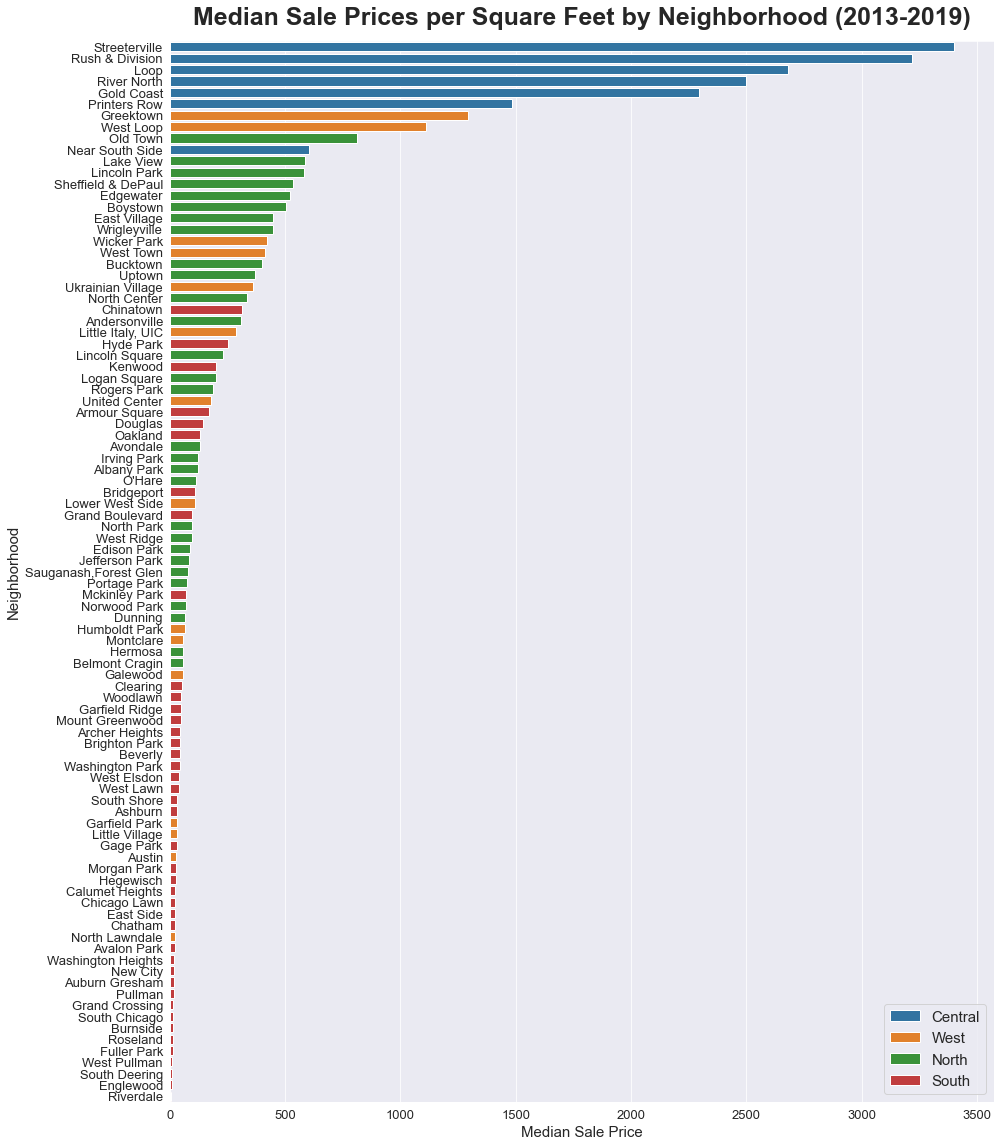

In [202]:
final_df['pricer_per_unit'] = final_df['sale_price'] / (final_df['hd_sf'] / final_df['n_units'])

final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['pricer_per_unit'].median().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

fig, ax = plt.subplots(figsize=(14,16))

sns.barplot(final_df_avgsale.pricer_per_unit, final_df_avgsale.pri_neigh, hue=final_df_avgsale.side, dodge=False)
ax.set_title('Median Sale Prices per Square Feet by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Median Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/saleprice_per_sqft_by_nbh.png')
plt.show()

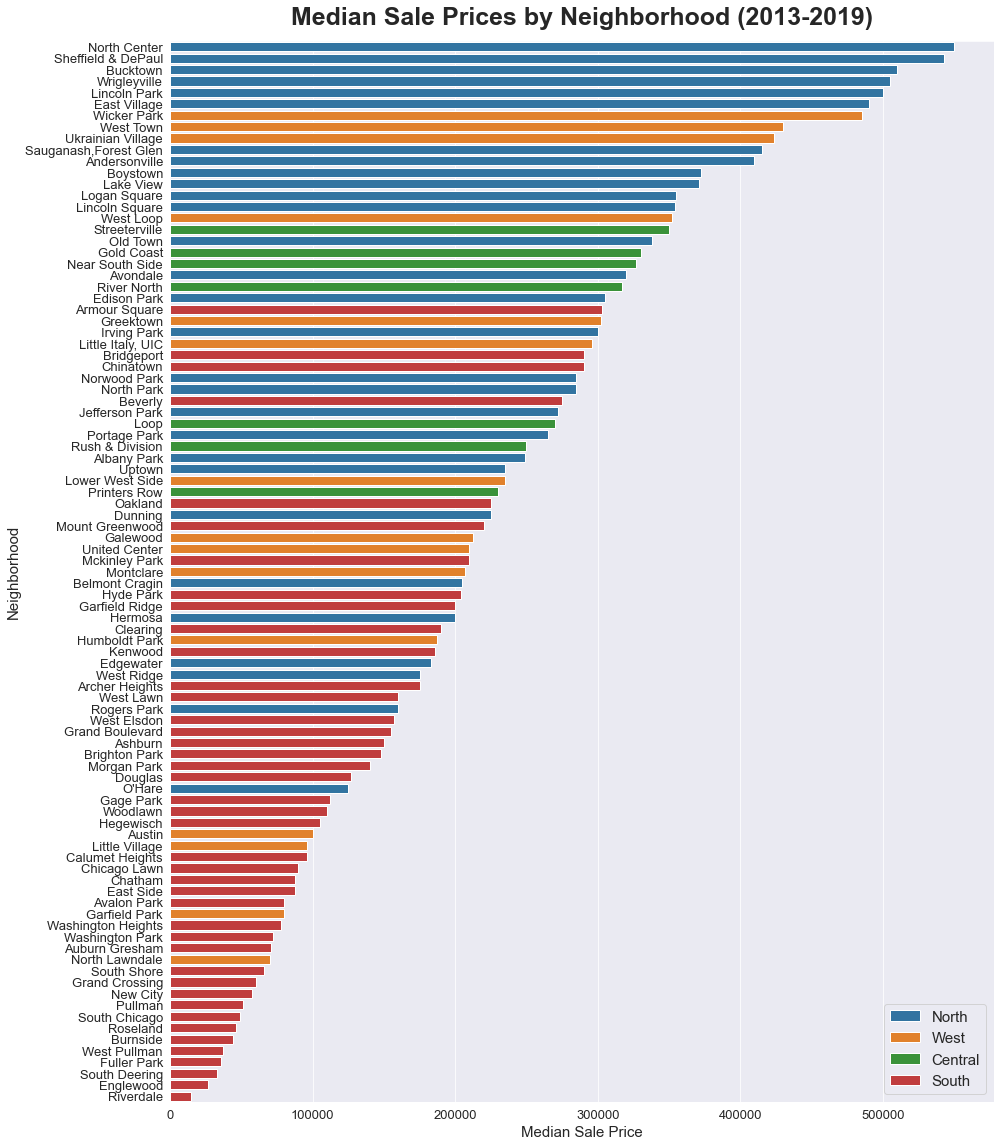

In [203]:
final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['sale_price'].median().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

fig, ax = plt.subplots(figsize=(14,16))

sns.barplot(final_df_avgsale.sale_price, final_df_avgsale.pri_neigh, hue=final_df_avgsale.side, dodge=False)
ax.set_title('Median Sale Prices by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Median Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/median_saleprice_by_nbh.png')
plt.show()

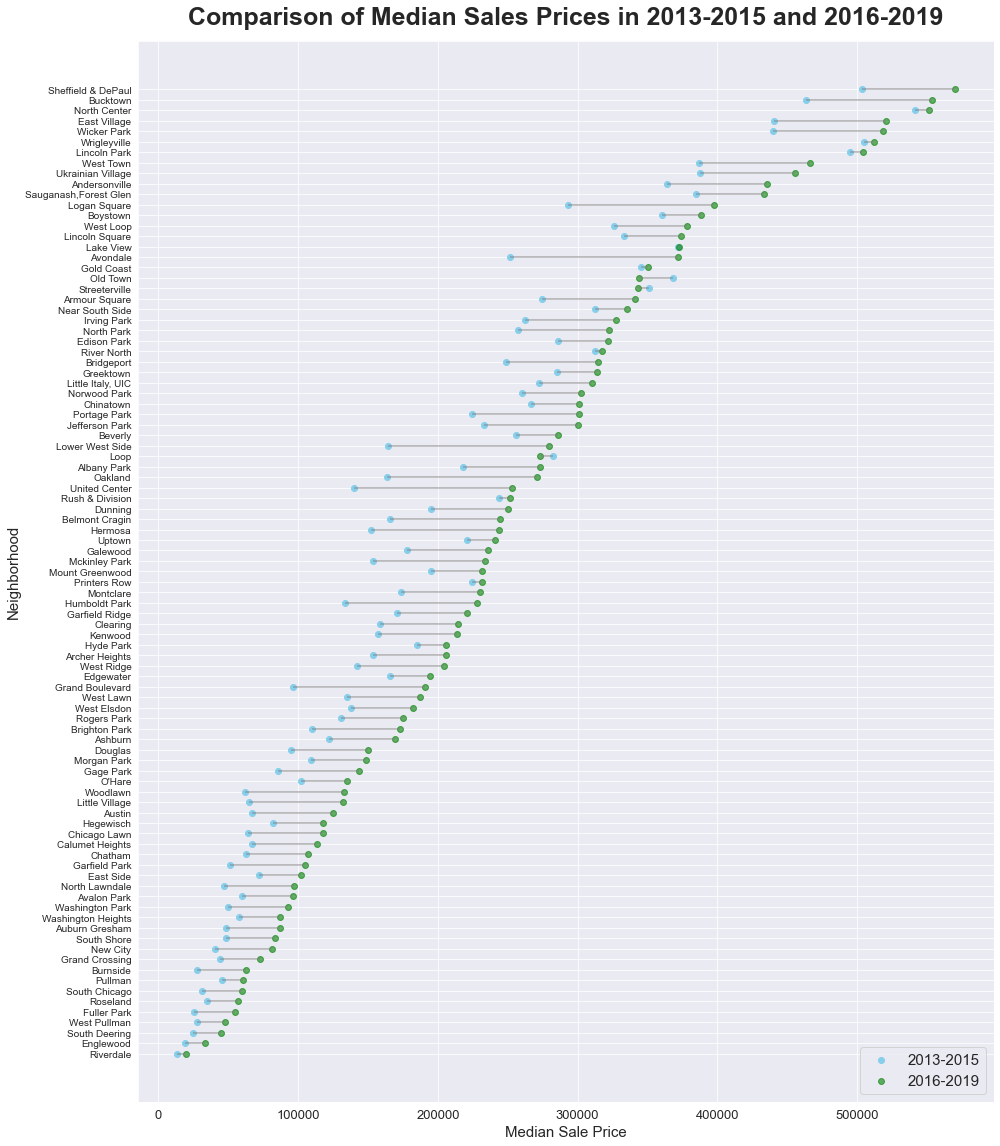

In [214]:
sales_compare = final_df.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
sales_compare['2013-2015'] = sales_compare[[2013, 2014, 2015]].mean(axis=1)
sales_compare['2016-2019'] = sales_compare[[2016, 2017, 2018, 2019]].mean(axis=1)
sales_compare = sales_compare[['2013-2015', '2016-2019']]
sales_compare = sales_compare.sort_values(by='2016-2019', ascending=True)


my_range=range(1,len(sales_compare.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
fig, ax = plt.subplots(figsize=(14,16))

plt.hlines(y=my_range, xmin=sales_compare['2013-2015'], xmax=sales_compare['2016-2019'], color='grey', alpha=0.6)
plt.scatter(sales_compare['2013-2015'], my_range, color='skyblue', alpha=1, label='2013-2015')
plt.scatter(sales_compare['2016-2019'], my_range, color='green', alpha=0.6 , label='2016-2019')
plt.legend()
 
# Add title and axis names
ax.set_title('Comparison of Median Sales Prices in 2013-2015 and 2016-2019', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Median Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(my_range, sales_compare.index)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/median_saleprice_avg.png')
plt.show()

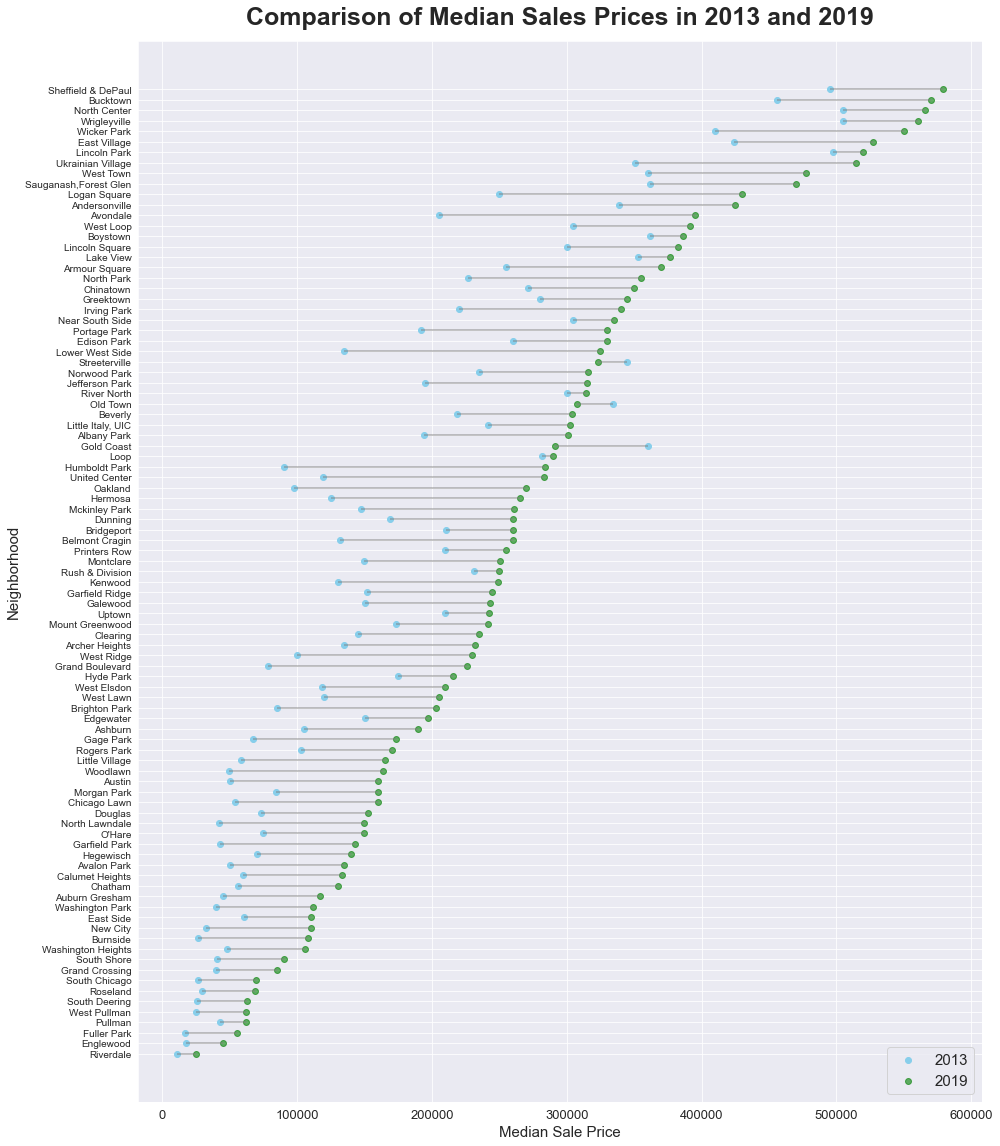

In [205]:
sales_compare_2 = final_df[(final_df['Year'] == 2013) | (final_df['Year'] == 2019)]
sales_compare_2 = sales_compare_2.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
sales_compare_2 = sales_compare_2.sort_values(by=2019, ascending=True)
sales_compare_2['diff'] = sales_compare_2[2019] - income_compare[2013]


my_range=range(1,len(sales_compare_2.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
fig, ax = plt.subplots(figsize=(14,16))

plt.hlines(y=my_range, xmin=sales_compare_2[2013], xmax=sales_compare_2[2019], color='grey', alpha=0.6)
plt.scatter(sales_compare_2[2013], my_range, color='skyblue', alpha=1, label='2013')
plt.scatter(sales_compare_2[2019], my_range, color='green', alpha=0.6 , label='2019')
plt.legend()
 
# Add title and axis names
ax.set_title('Comparison of Median Sales Prices in 2013 and 2019', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Median Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(my_range, sales_compare_2.index)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/median_saleprice.png')
plt.show()

      side      2013      2014      2015      2016      2017      2018
0  Central  3.466284  3.434414  3.441419  3.319768  2.864886  2.858917
1    North  3.889184  4.290038  4.528302  4.528302  4.440913  4.227642
2    South  1.751501  2.087119  2.743069  2.777127  3.061474  3.190351
3     West  3.604115  4.224709  4.939682  4.823778  4.996813  4.964020


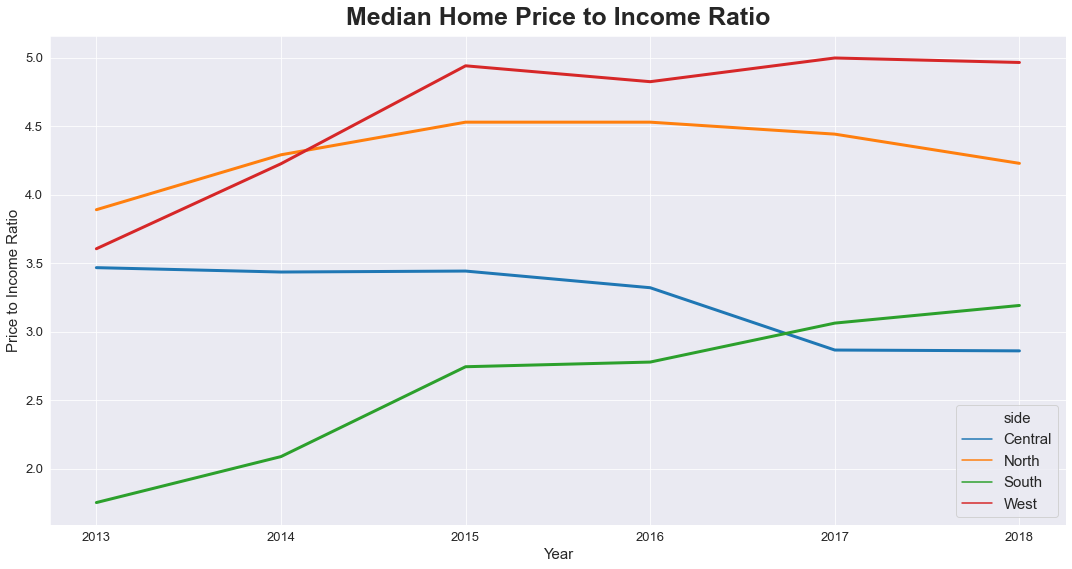

In [206]:
median_income_by_year = final_df.groupby(['side', 'Year'])['Median HH Income'].median().unstack()
median_price_by_year = final_df.groupby(['side', 'Year'])['sale_price'].median().unstack()
median_inc_to_price = pd.DataFrame()
for year in range(2013, 2019):
    median_inc_to_price[year] = median_price_by_year[year] / median_income_by_year[year]
median_inc_to_price = median_inc_to_price.reset_index()
print(median_inc_to_price.head())

median_inc_to_price = median_inc_to_price.melt(id_vars=["side"], var_name="year", value_name="price_to_income_ratio")

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(x="year", y="price_to_income_ratio", hue='side', data=median_inc_to_price, lw=3)
ax.set_title('Median Home Price to Income Ratio', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price to Income Ratio', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/side_price_to_income_ratio.png')
plt.show()

        pri_neigh      2013      2014      2015      2016      2017      2018
63        Oakland  2.066203  2.300667  6.392447  4.417966  8.068127  9.681972
28    Fuller Park  0.834356  1.534884  1.017821  1.505665  1.614661  3.456749
21        Douglas  1.356222  2.812280  3.159225  3.600510  2.819977  4.189535
31  Garfield Park  1.484146  1.671034  2.579560  2.885574  3.448540  4.560394
57       New City  0.997755  1.347826  1.629265  2.002470  2.174163  2.903740


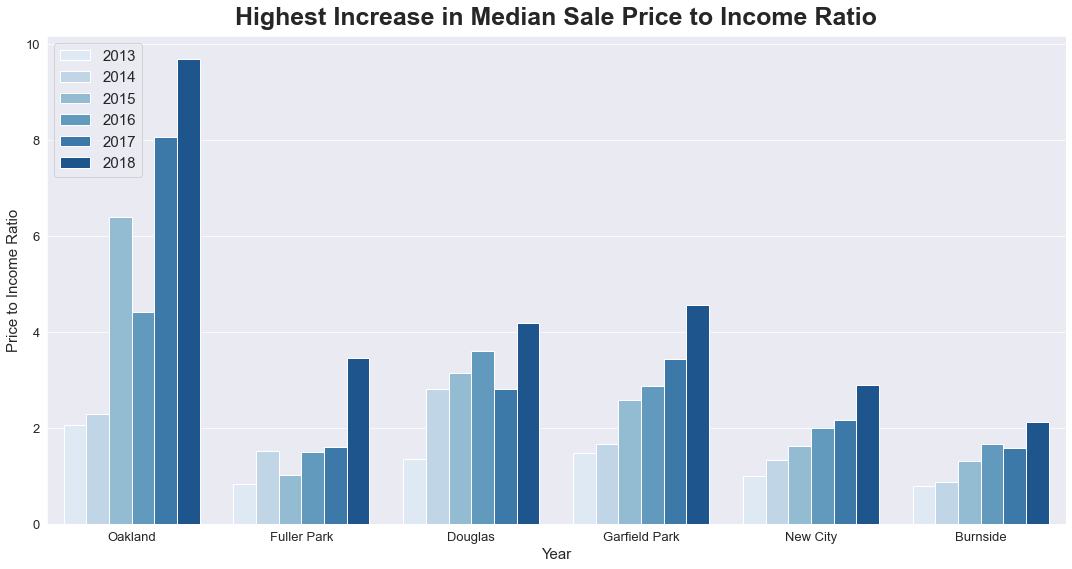

In [244]:
median_income_by_year = final_df.groupby(['pri_neigh', 'Year'])['Median HH Income'].median().unstack()
median_price_by_year = final_df.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
median_inc_to_price = pd.DataFrame()
for year in range(2013, 2019):
    median_inc_to_price[year] = median_price_by_year[year] / median_income_by_year[year]
median_inc_to_price = median_inc_to_price.reset_index()#.sort_values(by=2018, ascending=False)
median_inc_to_price['biggest_diff'] = (median_inc_to_price[2018] - median_inc_to_price[2013]) / median_inc_to_price[2013]
median_inc_to_price = median_inc_to_price.sort_values(by='biggest_diff', ascending=False)
median_inc_to_price = median_inc_to_price[['pri_neigh', 2013, 2014, 2015, 2016, 2017, 2018]]
print(median_inc_to_price.head())

median_inc_to_price = median_inc_to_price[:6].melt(id_vars=["pri_neigh"], var_name="year", value_name="price_to_income_ratio")

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,8))
#sns.palplot(sns.color_palette("Blues"))

sns.barplot(x="pri_neigh", y="price_to_income_ratio", hue="year", data=median_inc_to_price, palette="Blues")
#sns.barplot(x="year", y="price_to_income_ratio", hue="pri_neigh", data=median_inc_to_price)
#sns.lineplot(x="year", y="price_to_income_ratio", hue='pri_neigh', data=median_inc_to_price, lw=3)
ax.set_title('Highest Increase in Median Sale Price to Income Ratio', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price to Income Ratio', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left', fontsize=15)

fig.tight_layout()
plt.savefig('figures/neighborhood_price_to_income_ratio.png')
plt.show()

       pri_neigh   side  sale_price  Percent White  count
44     Lake View  North    371000.0       0.877754  12894
45  Lincoln Park  North    500000.0       0.879563   6530
81        Uptown  North    235000.0       0.713781   5340
65  Portage Park  North    265255.5       0.700915   5146
25     Edgewater  North    183000.0       0.708833   5025


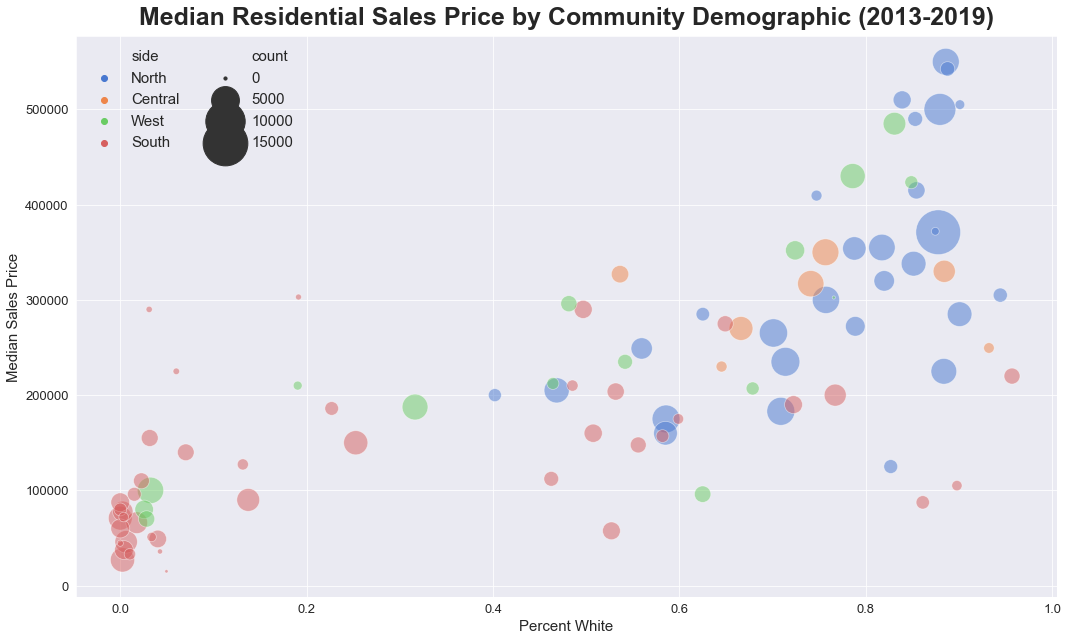

In [247]:
sale_pop = final_df.groupby(['pri_neigh', 'side']).agg({'sale_price':'median', 'Percent White':'median', 'pin':'count'})
sale_pop = sale_pop.reset_index().rename(columns={"pin": "count"})
sale_pop = sale_pop.sort_values(by='count', ascending=False)
print(sale_pop.head())

#sns.set(style="white")
fig, ax = plt.subplots(figsize=(15,9))

sns.scatterplot(x="Percent White", y="sale_price", hue="side", size="count",
                sizes=(10, 2000), alpha=.5, palette="muted", data=sale_pop)
ax.set_title('Median Residential Sales Price by Community Demographic (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Percent White', fontsize=15)
ax.set_ylabel('Median Sales Price', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left', fontsize=15, ncol=2, frameon=False)

fig.tight_layout()
plt.savefig('figures/demographic_scatter.png')
plt.show()

In [209]:
# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(df, row="Year", hue="Year", aspect=5.5, height=2.2, palette=pal)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "sale_price", clip_on=False, shade=True, alpha=1, lw=10.5, bw=2)
# g.map(sns.kdeplot, "sale_price", clip_on=False, color="w", lw=2, bw=.2)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0.9, .1, label, fontweight="bold", color=color, fontsize=30,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "sale_price")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.8)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

# plt.savefig('figures/overlap_density.png')
# plt.show()

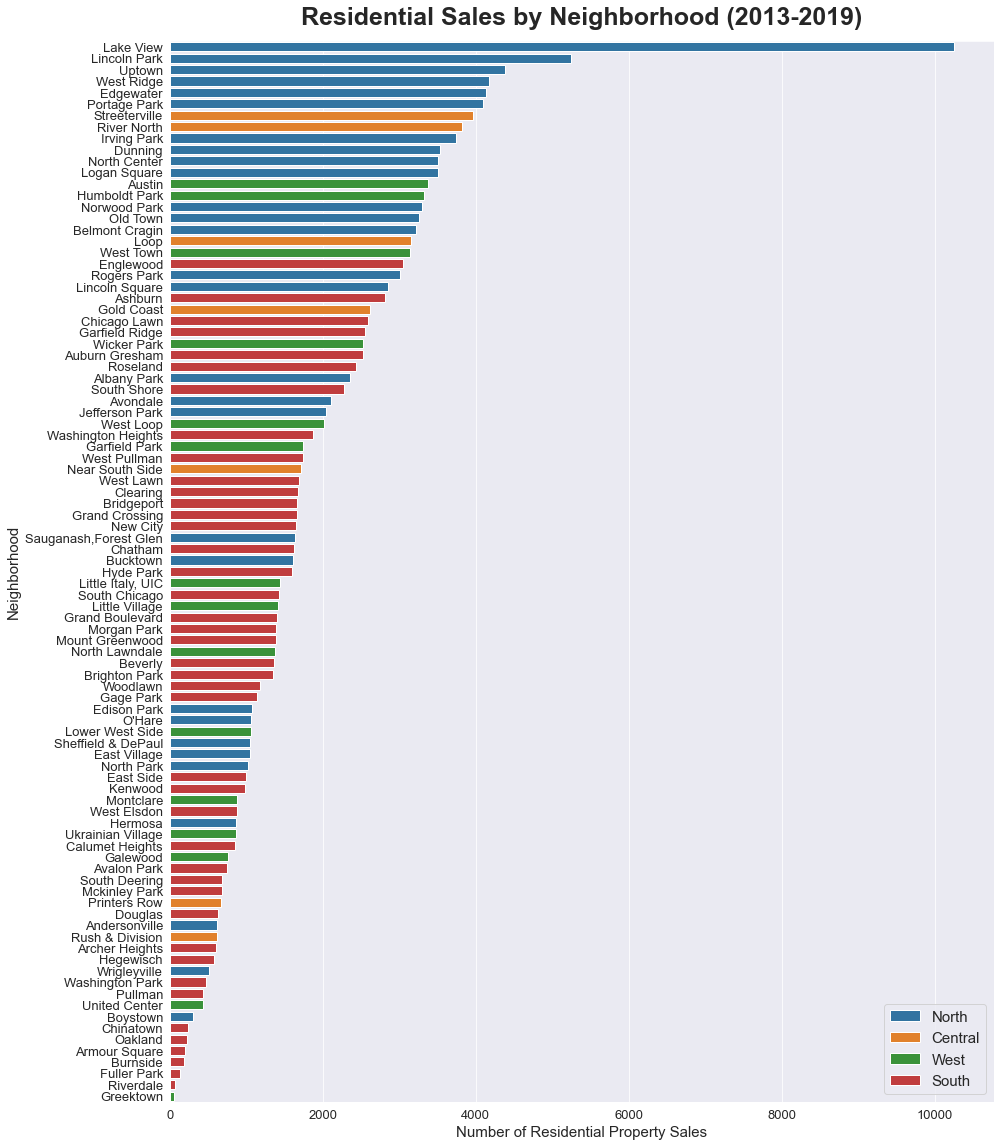

In [210]:
sales_gdf_count = pd.DataFrame(sales_gdf.groupby('pri_neigh')['pin'].nunique().sort_values(ascending=False)).reset_index()
sales_gdf_count = sales_gdf_count.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(14,16))

sns.barplot(sales_gdf_count.pin, sales_gdf_count.pri_neigh, hue=sales_gdf_count.side, dodge=False)
ax.set_title('Residential Sales by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Number of Residential Property Sales', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/num_sales.png')
plt.show()

In [211]:
# income_compare = sales_gdf[['pri_neigh', '2013 Median Income', '2018 Median Income']]
# income_compare = income_compare.groupby('pri_neigh')[['2013 Median Income', '2018 Median Income']].mean()
# income_compare = income_compare.sort_values(by='2018 Median Income', ascending=True)

# my_range=range(1,len(income_compare.index)+1)
 
# # The vertical plot is made using the hline function
# fig, ax = plt.subplots(figsize=(13,20))

# plt.hlines(y=my_range, xmin=income_compare['2013 Median Income'], xmax=income_compare['2018 Median Income'], color='grey', alpha=0.6)
# plt.scatter(income_compare['2013 Median Income'], my_range, color='skyblue', alpha=1, label='2013')
# plt.scatter(income_compare['2018 Median Income'], my_range, color='green', alpha=0.6 , label='2019')
# plt.legend()
 
# # Add title and axis names
# ax.set_title('Comparison of Median Income in 2013 and 2018', fontsize=25,
#              fontweight="bold", loc='center', y=1.01)
# ax.set_xlabel('Median Income', fontsize=15)
# ax.set_ylabel('Neighborhood', fontsize=15)
# plt.xticks(fontsize=13)
# plt.yticks(my_range, income_compare.index)
# plt.legend(loc='lower right', fontsize=15)

# plt.show()

In [256]:
census_gdf = gpd.read_file("https://data.cityofchicago.org/resource/bt9m-d2mf.geojson?$limit=9999999")
census_gdf["geo_12"] = census_gdf["geoid10"].map(lambda x: str(x)[:12])
merged_gdf = sales_compare[['pri_neigh', 'sales_price_diff']]\
    .merge(neighborhood_gdf[['pri_neigh', 'geometry']], on='pri_neigh', how="left")
sales_compare = gpd.GeoDataFrame(sales_compare.drop_duplicates()).sort_values(by='sales_price_diff')
merged_gdf = merged_gdf[["B02001_001E", "GEO_ID", "geometry"]].drop_duplicates()

census_gdf.head()

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry,geo_12
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",170316903002
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ...",170316809003
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ...",170316809003
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ...",170312909004
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ...",170312925004


In [255]:
census_gdf.head()

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ..."
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ..."
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ..."
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ..."


In [ ]:
import censusdata
import geopandas as gpd

# Download Census block boundaries for Chicago 
census_gdf = gpd.read_file("https://data.cityofchicago.org/resource/bt9m-d2mf.geojson?$limit=9999999")

# Extract 12-digit FIPS code from both datasets 
census_gdf["geo_12"] = census_gdf["geoid10"].map(lambda x: str(x)[:12])

# Merge ACS data with Census block boundaries 
# Assumes the crime df was converted to a geopandas df (crime_gdf)  
merged_gdf = (gpd.GeoDataFrame(acs_example.merge(census_gdf, on="geo_12", how="inner"), 
                               crs=crime_gdf.crs))

# Limit columns 
limited_gdf = merged_gdf[["B02001_001E", "GEO_ID", "geometry"]].drop_duplicates()

# Plot geopandas dataframe with total population by Census block
limited_gdf.plot()

# Print a sample of rows 
limited_gdf.sample(3)

In [251]:
final_df["geo_12"] = final_df["GEO_ID"].map(lambda x: str(x)[-12:])
final_df.head()

,GEO_ID,Year,pin,sale_price,age,addr,hd_sf,n_units,bldg_sf,geometry,...,Percent Housing Vacant,Number of Public Schools,crime_count,crimes_per_capita,station_id,station_name,distance_miles,pricer_per_sqft,pricer_per_unit,geo_12
0,1500000US170318392002,2015,17273100931118,53000.0,44,2921 S MICHIGAN AVE,365398.0,679.0,NaN,POINT (-87.62257654590501 41.8402291575061),...,0.111835,1.0,209.0,0.159664,30382.0,Cermak-McCormick Place,0.213983,98.487129,98.487129,170318392002
1,1500000US170313514001,2018,17343220150000,410000.0,130,3819 S WABASH AVE,3850.0,1.0,5050.0,POINT (-87.62436774377279 41.8249549567756),...,0.062945,1.0,296.0,0.161220,30214.0,35th-Bronzeville-IIT,0.183507,106.493506,106.493506,170313514001
2,1500000US170318420001,2019,17341030641004,250000.0,11,223 E 31ST ST,2738.0,3.0,NaN,POINT (-87.62080085952471 41.8381539098695),...,NaN,NaN,NaN,NaN,30214.0,35th-Bronzeville-IIT,0.303191,273.922571,273.922571,170318420001
3,1500000US170318396002,2018,17343101361002,174900.0,12,3552 S GILES AVE,6197.0,8.0,NaN,POINT (-87.6196469343668 41.8295568668821),...,0.360335,3.0,191.0,0.359699,30214.0,35th-Bronzeville-IIT,0.450940,225.786671,225.786671,170318396002
4,1500000US170313515002,2017,17334230234016,114218.0,7,3506 S STATE ST,22908.0,77.0,NaN,POINT (-87.6271329091275 41.8307343424877),...,0.086758,0.0,75.0,0.147929,30214.0,35th-Bronzeville-IIT,0.088796,383.917671,383.917671,170313515002


In [272]:
census_gdf

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry,geo_12
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",170316903002
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ...",170316809003
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ...",170316809003
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ...",170312909004
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ...",170312925004
...,...,...,...,...,...,...,...,...,...
46352,17,Block 1028,1028,2203001028,170312203001028,220300,031,"MULTIPOLYGON (((-87.69323 41.92767, -87.69385 ...",170312203001
46353,17,Block 1030,1030,2203001030,170312203001030,220300,031,"MULTIPOLYGON (((-87.69320 41.92667, -87.69351 ...",170312203001
46354,17,Block 2014,2014,8310002014,170318310002014,831000,031,"MULTIPOLYGON (((-87.67759 41.91624, -87.67759 ...",170318310002
46355,17,Block 2001,2001,8310002001,170318310002001,831000,031,"MULTIPOLYGON (((-87.67398 41.91783, -87.67397 ...",170318310002


In [271]:
sales_compare

Year,geo_12,2013,2014,2015,2016,2017,2018,2019,2013-2015,2016-2019,sales_price_diff
0,170310101001,192900.0,130000.0,212000.0,73000.0,99000.0,75500.0,101248.0,178300.000000,87187.000000,-0.511010
1,170310101002,90000.0,65500.0,180750.0,150000.0,154000.0,127866.0,187750.0,112083.333333,154904.000000,0.382043
2,170310101003,122500.0,137500.0,185000.0,154075.0,176000.0,170000.0,197750.0,148333.333333,174456.250000,0.176110
3,170310102011,157500.0,90748.0,155000.0,116750.0,260000.0,242500.0,212450.0,134416.000000,207925.000000,0.546877
4,170310102012,73000.0,87625.0,115000.0,117000.0,134850.0,145000.0,132789.5,91875.000000,132409.875000,0.441196
...,...,...,...,...,...,...,...,...,...,...,...
2145,170318439002,27100.0,313000.0,87000.0,45000.0,340000.0,272500.0,310000.0,142366.666667,241875.000000,0.698958
2146,170318439003,33299.0,34261.5,40000.0,47500.0,54300.0,70000.0,57500.0,35853.500000,57325.000000,0.598868
2147,170318439004,25100.0,30227.5,33950.0,28500.0,79000.0,60200.0,138000.0,29759.166667,76425.000000,1.568116
2148,170318439005,27550.0,32450.0,74500.0,62450.0,77500.0,32500.0,74450.0,44833.333333,61725.000000,0.376766


In [275]:
final_df.groupby(['geo_12', 'Year'])['sale_price'].median().unstack()

Year,2013,2014,2015,2016,2017,2018,2019
geo_12,,,,,,,
170310101001,192900.0,130000.0,212000.0,73000.0,99000.0,75500.0,101248.0
170310101002,90000.0,65500.0,180750.0,150000.0,154000.0,127866.0,187750.0
170310101003,122500.0,137500.0,185000.0,154075.0,176000.0,170000.0,197750.0
170310102011,157500.0,90748.0,155000.0,116750.0,260000.0,242500.0,212450.0
170310102012,73000.0,87625.0,115000.0,117000.0,134850.0,145000.0,132789.5
...,...,...,...,...,...,...,...
170318439002,27100.0,313000.0,87000.0,45000.0,340000.0,272500.0,310000.0
170318439003,33299.0,34261.5,40000.0,47500.0,54300.0,70000.0,57500.0
170318439004,25100.0,30227.5,33950.0,28500.0,79000.0,60200.0,138000.0


In [273]:
sales_compare = final_df.groupby(['geo_12', 'Year'])['sale_price'].median().unstack()
sales_compare['2013-2015'] = sales_compare[[2013, 2014, 2015]].mean(axis=1)
sales_compare['2016-2019'] = sales_compare[[2016, 2017, 2018, 2019]].mean(axis=1)
sales_compare['sales_price_diff'] = (sales_compare['2016-2019'] - sales_compare['2013-2015'])  / sales_compare['2013-2015']
sales_compare = sales_compare.reset_index()
sales_compare

Year,geo_12,2013,2014,2015,2016,2017,2018,2019,2013-2015,2016-2019,sales_price_diff
0,170310101001,192900.0,130000.0,212000.0,73000.0,99000.0,75500.0,101248.0,178300.000000,87187.000000,-0.511010
1,170310101002,90000.0,65500.0,180750.0,150000.0,154000.0,127866.0,187750.0,112083.333333,154904.000000,0.382043
2,170310101003,122500.0,137500.0,185000.0,154075.0,176000.0,170000.0,197750.0,148333.333333,174456.250000,0.176110
3,170310102011,157500.0,90748.0,155000.0,116750.0,260000.0,242500.0,212450.0,134416.000000,207925.000000,0.546877
4,170310102012,73000.0,87625.0,115000.0,117000.0,134850.0,145000.0,132789.5,91875.000000,132409.875000,0.441196
...,...,...,...,...,...,...,...,...,...,...,...
2145,170318439002,27100.0,313000.0,87000.0,45000.0,340000.0,272500.0,310000.0,142366.666667,241875.000000,0.698958
2146,170318439003,33299.0,34261.5,40000.0,47500.0,54300.0,70000.0,57500.0,35853.500000,57325.000000,0.598868
2147,170318439004,25100.0,30227.5,33950.0,28500.0,79000.0,60200.0,138000.0,29759.166667,76425.000000,1.568116
2148,170318439005,27550.0,32450.0,74500.0,62450.0,77500.0,32500.0,74450.0,44833.333333,61725.000000,0.376766


            geo_12  sales_price_diff  \
4577  170310810005         -0.909657   
4572  170310810005         -0.909657   
4573  170310810005         -0.909657   
4574  170310810005         -0.909657   
4575  170310810005         -0.909657   

                                               geometry  
4577  MULTIPOLYGON (((-87.63294 41.90182, -87.63294 ...  
4572  MULTIPOLYGON (((-87.63363 41.89660, -87.63392 ...  
4573  MULTIPOLYGON (((-87.63388 41.90221, -87.63387 ...  
4574  MULTIPOLYGON (((-87.63265 41.89661, -87.63279 ...  
4575  MULTIPOLYGON (((-87.63290 41.90054, -87.63306 ...  


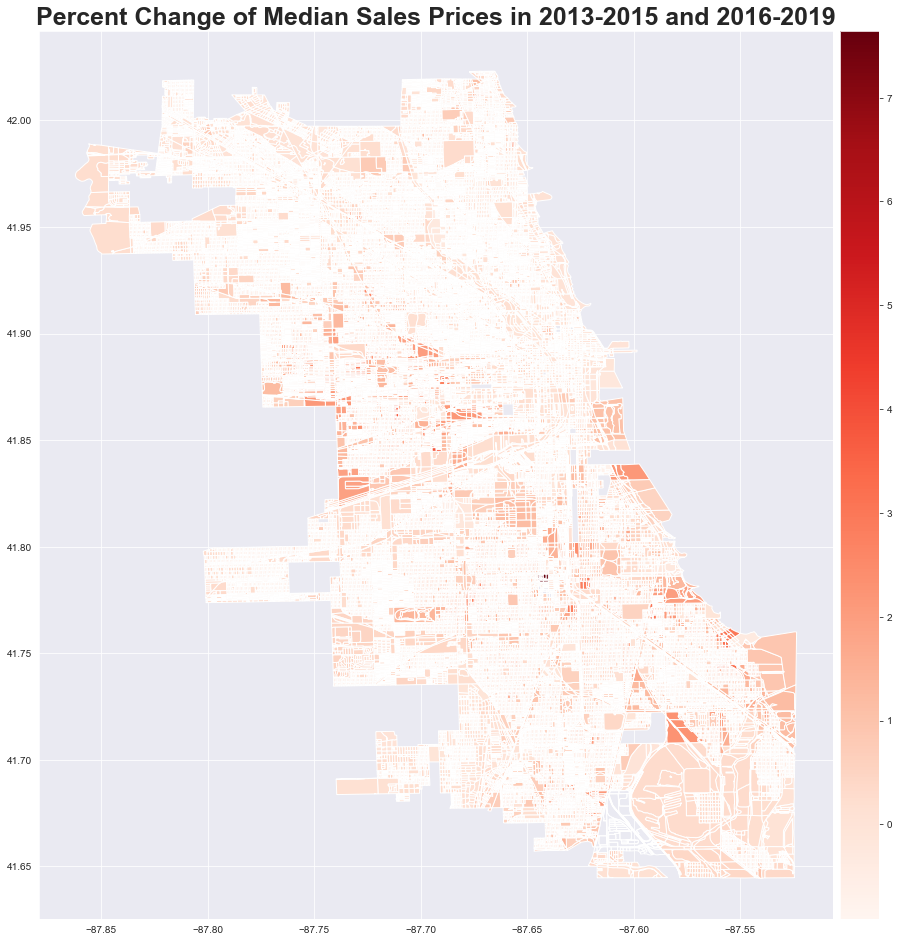

In [276]:
census_gdf = gpd.read_file("https://data.cityofchicago.org/resource/bt9m-d2mf.geojson?$limit=9999999")
census_gdf["geo_12"] = census_gdf["geoid10"].map(lambda x: str(x)[:12])
merged_gdf = sales_compare[['geo_12', 'sales_price_diff']]\
    .merge(census_gdf[['geo_12', 'geometry']], on='geo_12', how="left")
merged_gdf = gpd.GeoDataFrame(merged_gdf.drop_duplicates()).sort_values(by='sales_price_diff')
print(merged_gdf.head())

fig, ax = plt.subplots(1, 1, figsize=(13,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax = merged_gdf.plot(column='sales_price_diff', legend=True, cmap='Reds', ax=ax, cax=cax)
ax.set_title('Percent Change of Median Sales Prices in 2013-2015 and 2016-2019', fontsize=25,
             fontweight="bold", loc='center', y=2.12)

fig.tight_layout()
plt.savefig('figures/censusblock_saleprice_change_heatmap.png')
plt.show()

        pri_neigh  sales_price_diff  \
64       Old Town         -0.066361   
50           Loop         -0.033756   
78  Streeterville         -0.022544   
44      Lake View          0.001512   
33     Gold Coast          0.014450   

                                             geometry  
64  MULTIPOLYGON (((-87.63612 41.91847, -87.63569 ...  
50  MULTIPOLYGON (((-87.61397 41.88841, -87.61325 ...  
78  MULTIPOLYGON (((-87.61369 41.89313, -87.61369 ...  
44  MULTIPOLYGON (((-87.66402 41.94728, -87.66402 ...  
33  MULTIPOLYGON (((-87.62646 41.91147, -87.62640 ...  


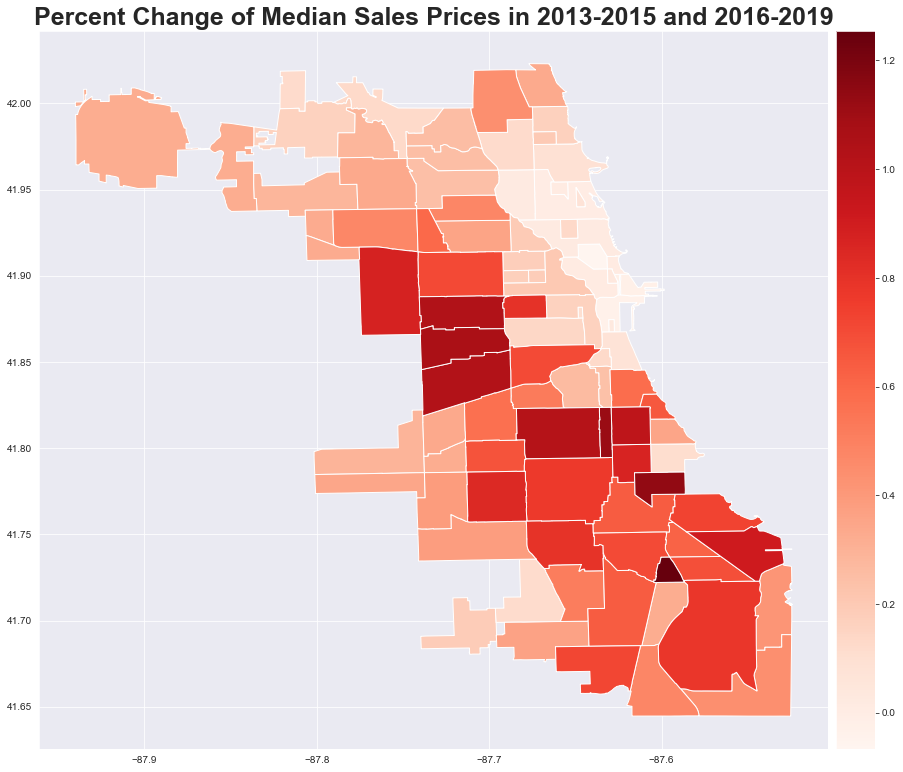

In [235]:
sales_compare = final_df.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
sales_compare['2013-2015'] = sales_compare[[2013, 2014, 2015]].mean(axis=1)
sales_compare['2016-2019'] = sales_compare[[2016, 2017, 2018, 2019]].mean(axis=1)
sales_compare['sales_price_diff'] = (sales_compare['2016-2019'] - sales_compare['2013-2015'])  / sales_compare['2013-2015']
#sales_compare['sales_price_diff'] = sales_compare['2016-2019'] - sales_compare['2013-2015']

neighborhood_gdf = gpd.read_file('../data/Boundaries - Neighborhoods.geojson')

sales_compare = sales_compare.reset_index()
sales_compare = sales_compare[['pri_neigh', 'sales_price_diff']]\
    .merge(neighborhood_gdf[['pri_neigh', 'geometry']], on='pri_neigh', how="left")
sales_compare = gpd.GeoDataFrame(sales_compare.drop_duplicates()).sort_values(by='sales_price_diff')
print(sales_compare.head())

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(13,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax = sales_compare.plot(column='sales_price_diff', legend=True, cmap='Reds', ax=ax, cax=cax)
ax.set_title('Percent Change of Median Sales Prices in 2013-2015 and 2016-2019', fontsize=25,
             fontweight="bold", loc='center', y=2.12)

fig.tight_layout()
plt.savefig('figures/saleprice_change_heatmap.png')
plt.show()


          pri_neigh  price_income_diff  \
92     Printers Row          -0.300500   
90  Near South Side          -0.181503   
82     North Center          -0.164953   
83      River North          -0.148524   
84        Greektown          -0.142458   

                                             geometry  
92  MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ...  
90  MULTIPOLYGON (((-87.61666 41.85779, -87.61657 ...  
82  MULTIPOLYGON (((-87.67336 41.93234, -87.67342 ...  
83  MULTIPOLYGON (((-87.63145 41.90390, -87.63144 ...  
84  MULTIPOLYGON (((-87.64581 41.87541, -87.64589 ...  


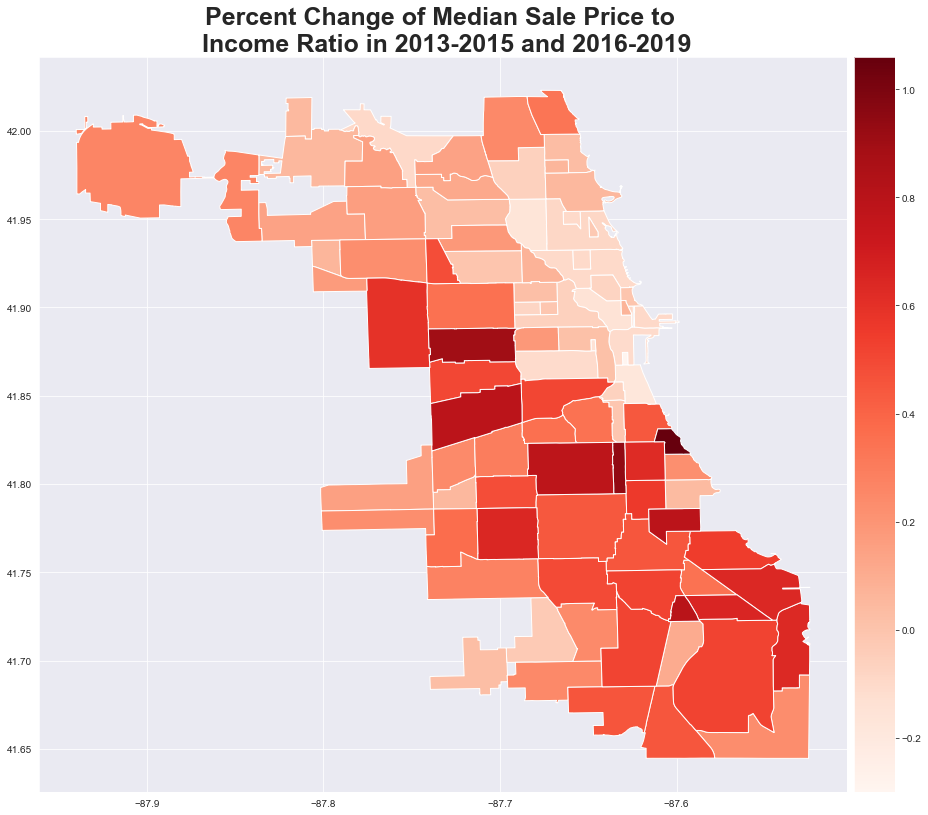

In [246]:
median_income_by_year = final_df.groupby(['pri_neigh', 'Year'])['Median HH Income'].median().unstack()
median_price_by_year = final_df.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
median_inc_to_price = pd.DataFrame()
for year in range(2013, 2019):
    median_inc_to_price[year] = median_price_by_year[year] / median_income_by_year[year]
median_inc_to_price = median_inc_to_price.reset_index()#.sort_values(by=2018, ascending=False)
median_inc_to_price['biggest_diff'] = (median_inc_to_price[2018] - median_inc_to_price[2013]) / median_inc_to_price[2013]
median_inc_to_price = median_inc_to_price.sort_values(by='biggest_diff', ascending=False)
median_inc_to_price = median_inc_to_price[['pri_neigh', 2013, 2014, 2015, 2016, 2017, 2018]]

median_inc_to_price['2013-2015'] = median_inc_to_price[[2013, 2014, 2015]].mean(axis=1)
median_inc_to_price['2016-2018'] = median_inc_to_price[[2016, 2017, 2018]].mean(axis=1)
median_inc_to_price['price_income_diff'] = (median_inc_to_price['2016-2018'] - median_inc_to_price['2013-2015'])\
    / median_inc_to_price['2013-2015']
median_inc_to_price = median_inc_to_price[['pri_neigh', 'price_income_diff']]\
    .merge(neighborhood_gdf[['pri_neigh', 'geometry']], on='pri_neigh', how="left")
median_inc_to_price = gpd.GeoDataFrame(median_inc_to_price.drop_duplicates()).sort_values(by='price_income_diff')
print(median_inc_to_price.head())

fig, ax = plt.subplots(1, 1, figsize=(13,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax = median_inc_to_price.plot(column='price_income_diff', legend=True, cmap='Reds', ax=ax, cax=cax)
ax.set_title('Percent Change of Median Sale Price to \n Income Ratio in 2013-2015 and 2016-2019', fontsize=25,
             fontweight="bold", loc='center', y=2.12)

fig.tight_layout()
plt.savefig('figures/saleprice_income_ratio_change_heatmap.png')
plt.show()